**Introduction**

In recent years, television entertainment has evolved dramatically, becoming an essential part of global culture and everyday life. As streaming platforms expand and diversify their offerings, understanding viewer preferences and engagement has become crucial for producers, advertisers, and industry analysts. This report examines the "Most Watched Movies and TV Shows" by analyzing the TV Show Watchtime Dataset for 2024, a comprehensive collection of data that provides an in-depth look into the world of television entertainment.

The dataset allows us to explore viewer behavior and trends across various genres, including Action, Drama, Thriller, Fantasy, and Crime. Each show is analyzed based on its premiere year, genre, and total watchtime, measured in millions of hours, offering a rich perspective on the popularity of content across demographics. By delving into these insights, we aim to reveal the preferences that shape the television landscape, the genres and shows that captivate audiences, and the broader trends that define 2024's entertainment industry. This analysis offers an invaluable resource for understanding the dynamics of viewer engagement and the impact of genre diversity on the success of modern television.

 #### Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/kaggle/input/most-watched-movies-and-tv-shows/flixpatrol.csv
/kaggle/input/most-watched-movies-and-tv-shows/flixpatrol.xlsx


#### Reading the dataset

In [ ]:
data = pd.read_csv('/kaggle/input/most-watched-movies-and-tv-shows/flixpatrol.csv', index_col = "Rank")

In [ ]:
data.head(n=10)

,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
Rank,,,,,,
1.0,The Night Agent,TV Show,2023.0,Action,"812,100,000",812.1M
2.0,Ginny & Georgia,TV Show,2021.0,Drama,"665,100,000",665.1M
3.0,The Glory,TV Show,2022.0,Thriller,"622,800,000",622.8M
4.0,Wednesday,TV Show,2022.0,Fantasy,"507,700,000",507.7M
5.0,Queen Charlotte: A Bridgerton Story,TV Show,2023.0,Drama,"503,000,000",503.0M
6.0,You,TV Show,2018.0,Crime,"440,600,000",440.6M
7.0,La Reina del Sur,TV Show,2011.0,Drama,"429,600,000",429.6M
8.0,Outer Banks,TV Show,2020.0,Drama,"402,500,000",402.5M
9.0,Ginny & Georgia,TV Show,2021.0,Drama,"302,100,000",302.1M


In [ ]:
data.dtypes

Title                    object
Type                     object
Premiere                float64
Genre                    object
Watchtime                object
Watchtime in Million     object
dtype: object

In [ ]:
data.describe()

,Premiere
count,18030.000000
mean,2014.188297
std,8.844017
min,1940.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2023.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18164 entries, 1.0 to 18214.0
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 18164 non-null  object 
 1   Type                  18164 non-null  object 
 2   Premiere              18030 non-null  float64
 3   Genre                 17984 non-null  object 
 4   Watchtime             18164 non-null  object 
 5   Watchtime in Million  18164 non-null  object 
dtypes: float64(1), object(5)
memory usage: 993.3+ KB


The dataset encompasses information on the quantity of movies and TV shows watched and produced over a period. It comprises seven columns: Rank, Title, Type, Premiere (Year), Genre, Watchtime, and Watchtime in million. The dataset comprises 18,164 rows, necessitating preprocessing and cleaning. Notably, there are 134 null values in the Premiere column and 180 in the Genre column.

To address this, null values in the Genre column are substituted with 'unknown,' while null values in the Premiere column are replaced with the median value derived from the entire set. Additionally, commas and the character 'M' are eliminated, and data types are adjusted accordingly.

#### Preprocessing and data preparation

In [ ]:
# Check missing values 
data.isnull().sum()

Title                     0
Type                      0
Premiere                134
Genre                   180
Watchtime                 0
Watchtime in Million      0
dtype: int64

In [ ]:
# Check unique Genres we have. 
data['Genre'].unique()

array(['Action', 'Drama', 'Thriller', 'Fantasy', 'Crime', 'Reality-Show',
       'Comedy', 'History', 'Superhero', 'Animation', 'Science Fiction',
       'Horror', 'Adventure', 'Documentary', 'War', 'Musical', nan,
       'Romance', 'Family', 'Stand-Up', 'Western', 'Sports', 'Biography',
       'Talk Show', 'Game-Show', 'Broadcast', 'Concerts', 'News',
       'Fairy Tale'], dtype=object)

In [ ]:
# Fill null values in Genre column with constant
data['Genre'].fillna("Unknown", inplace=True)

/tmp/ipykernel_33/1327136642.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Genre'].fillna("Unknown", inplace=True)


In [ ]:
# Fill missing values for 'Premiere' with the median year
data['Premiere'].fillna(data['Premiere'].median(), inplace=True)


/tmp/ipykernel_33/2129791833.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Premiere'].fillna(data['Premiere'].median(), inplace=True)


In [ ]:
# Convert 'Premiere' to integer
data['Premiere'] = data['Premiere'].astype(int)

In [ ]:
data.tail()

,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
Rank,,,,,,
18210.0,Spiritual House,TV Show,2017,Talk Show,"100,000",0.1M
18211.0,Suite Francaise,Movie,2014,War,"100,000",0.1M
18212.0,The Bishop's Bedroom,Movie,1977,Comedy,"100,000",0.1M
18213.0,30 Chưa Phải Tết,Movie,2020,Comedy,"100,000",0.1M
18214.0,The Promised Land,Movie,2019,Crime,"100,000",0.1M


In [ ]:
# Check missing values 
data.isnull().sum()

Title                   0
Type                    0
Premiere                0
Genre                   0
Watchtime               0
Watchtime in Million    0
dtype: int64

In [ ]:
# Replace ',' seprator in watchtime to convert it into numerical type
data['Watchtime'] = pd.to_numeric(data['Watchtime'].str.replace(',', ''),errors='coerce')

In [ ]:
data["Watchtime in Million"] = data['Watchtime in Million'].str.replace('M', '').astype(float)

In [ ]:
data.head()

,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
Rank,,,,,,
1.0,The Night Agent,TV Show,2023,Action,812100000,812.1
2.0,Ginny & Georgia,TV Show,2021,Drama,665100000,665.1
3.0,The Glory,TV Show,2022,Thriller,622800000,622.8
4.0,Wednesday,TV Show,2022,Fantasy,507700000,507.7
5.0,Queen Charlotte: A Bridgerton Story,TV Show,2023,Drama,503000000,503.0


In [ ]:
data.dtypes

Title                    object
Type                     object
Premiere                  int64
Genre                    object
Watchtime                 int64
Watchtime in Million    float64
dtype: object

#### Data Visualization

In [ ]:
# data_cleaned = data.replace('unknown', pd.NA).dropna(how='any')

In [ ]:
#data_cleaned.head()

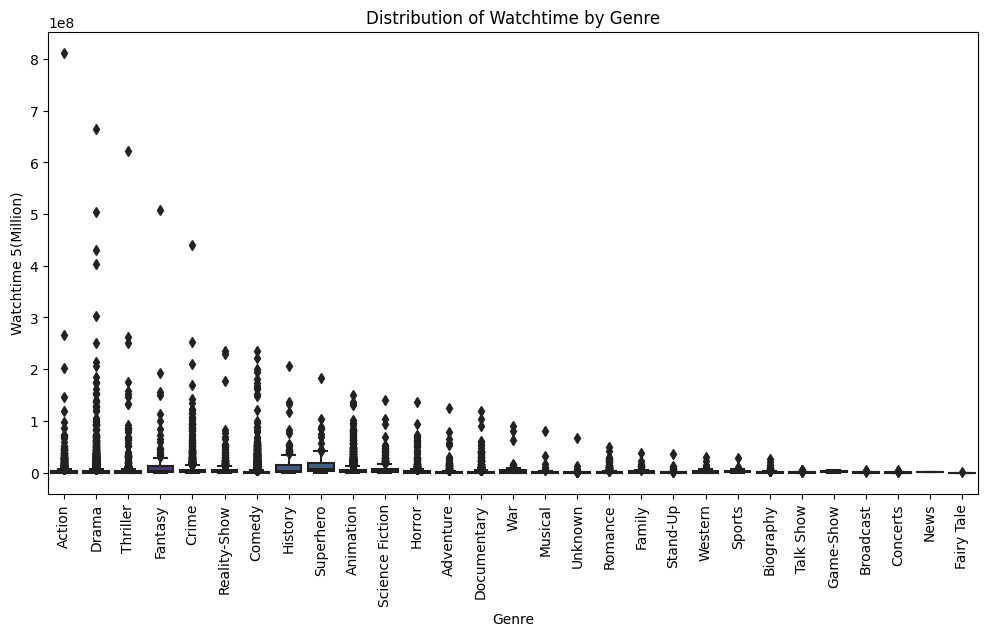

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Watchtime', data=data, palette='viridis')
plt.title('Distribution of Watchtime by Genre')
plt.xlabel('Genre')
plt.ylabel('Watchtime 5(Million)')
plt.xticks(rotation=90)
plt.show()

The graph displays the distribution of watchtime in millions across various TV show genres, allowing us to compare which genres have the highest and lowest viewership in 2024. The watchtime data, measured in millions of hours, is shown on the y-axis, while the genres are labeled along the x-axis. Each genre has a box plot, representing the spread of watchtime data within that category, with outliers marked as individual points above or below the main distribution
This graph highlights how genres like Action and Drama dominate viewer engagement, while other genres see a more limited but dedicated audience. The presence of outliers in many genres suggests that certain shows stand out, even in less popular categories. This dataset offers valuable insights into which genres capture the most attention and which have niche or emerging audiences.

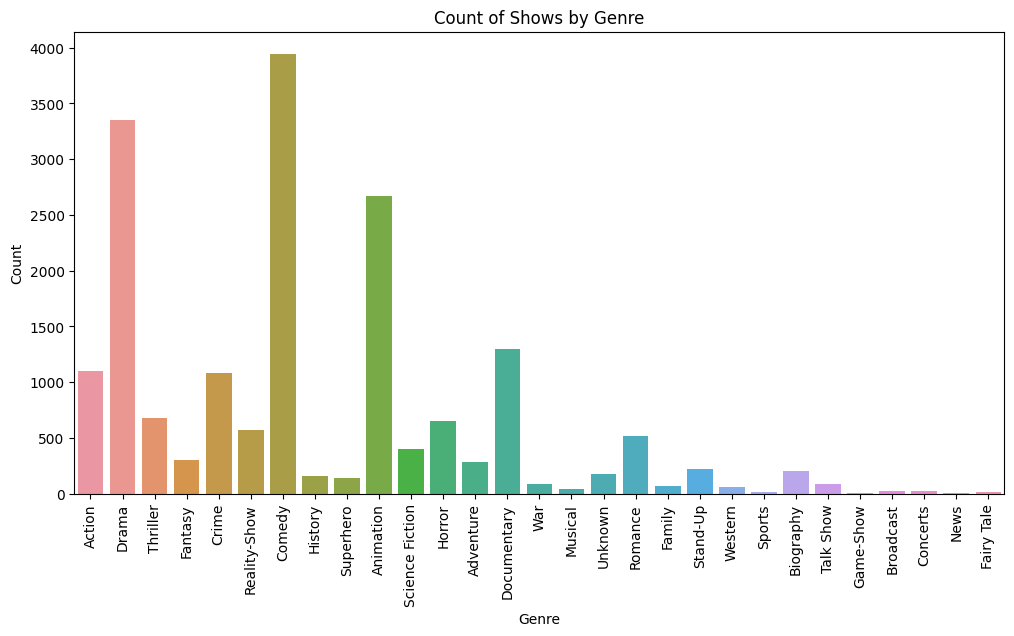

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=data)
plt.title('Count of Shows by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Overall, this chart illustrates the popularity of different genres in terms of the number of shows produced, with Comedy, Drama, and Reality-Show leading the way. This genre distribution helps us understand industry trends and the types of content that are most readily available to viewers.


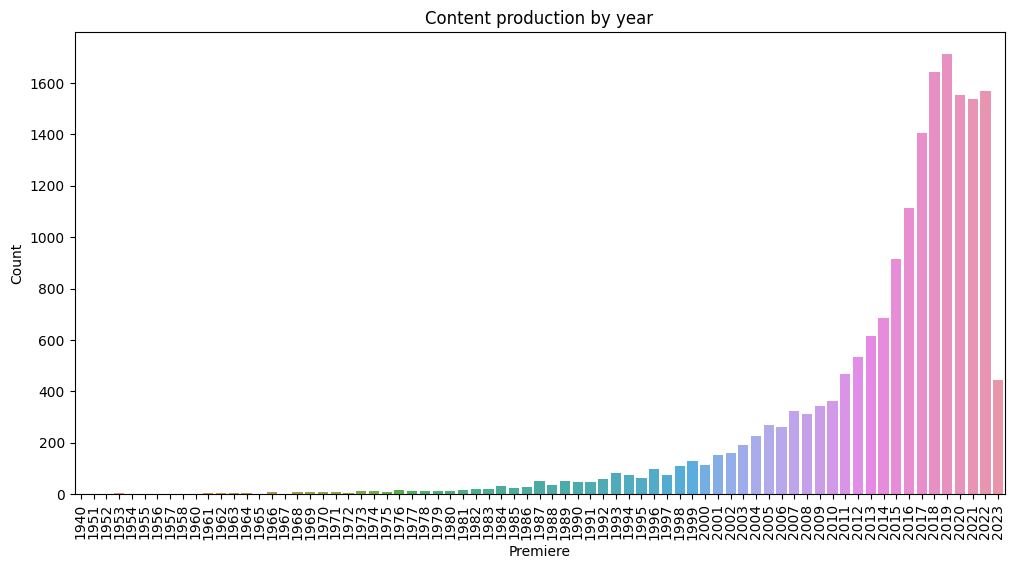

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Premiere', data=data)
plt.title('Content production by year')
plt.xlabel('Premiere')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

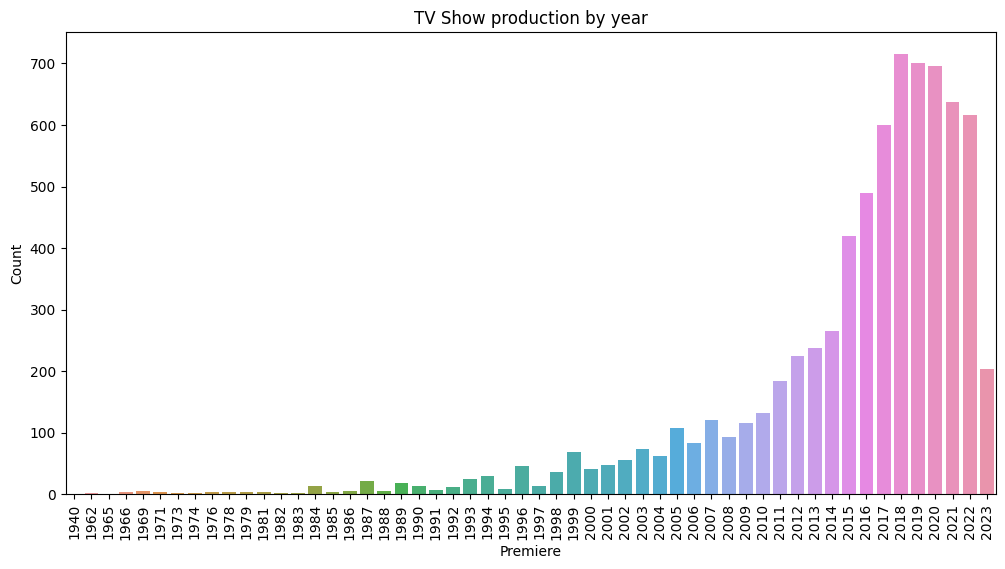

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Premiere', data=data[data["Type"] =="TV Show"])
plt.title('TV Show production by year')
plt.xlabel('Premiere')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

This graph provides a visual timeline of the evolution of television content production, with a clear exponential growth pattern peaking in the 2020s, followed by a slight dip. This trend reflects both technological advancements and changing audience consumption patterns.Production peaks in the early 2020s, with 2021 and 2022 showing the highest counts. This period likely represents the impact of the "streaming boom," where streaming services expanded their libraries significantly, as well as the demand for content driven by the COVID-19 pandemic.The count for 2023 shows a slight decrease compared to previous years. This might indicate saturation in content production or adjustments due to shifts in consumer preferences and economic factors affecting the industry.

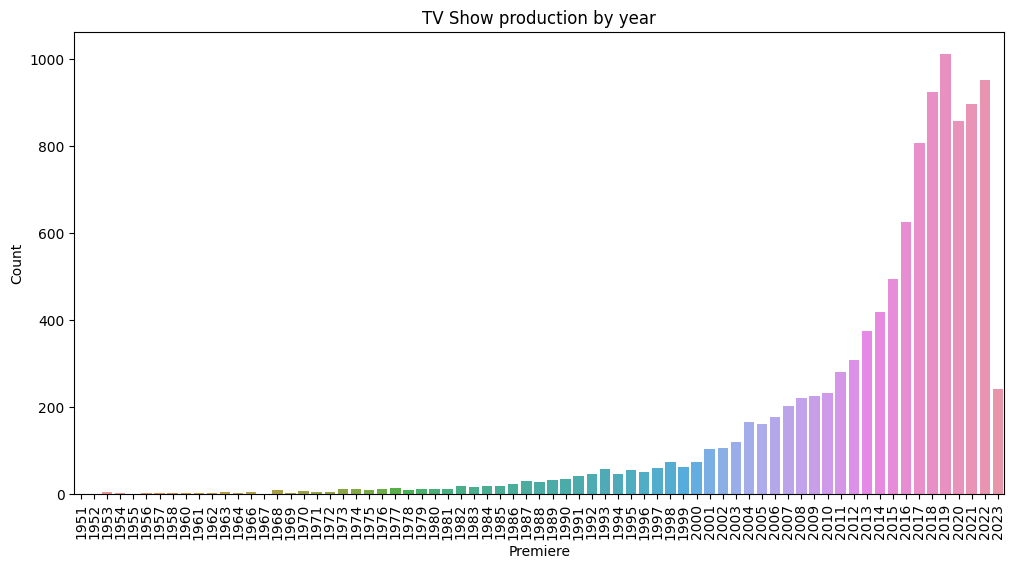

In [ ]:
#newdata = data[data["Type"] == "TV Show"].sort_values(by="Premiere", ascending=False).head(10)
#newdata
plt.figure(figsize=(12, 6))
sns.countplot(x='Premiere', data=data[data["Type"] =="Movie"].sort_values(by='Premiere', ascending=False))
plt.title('Movies production by year')
plt.xlabel('Premiere')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

The chart shows a sharp rise in show production occurs from around 2010 onward, with the count reaching over 1000 shows per year by the late 2010s and early 2020s. This increase is largely driven by the emergence of streaming services, which led to more platforms and greater demand for varied content. The streaming boom encouraged massive content production to attract and retain subscribers.
Peak and Slight Decline in Early 2020s. A peak in production around 2021, followed by a slight decline in 2023. This dip could be attributed to various factors, such as production adjustments post-pandemic, changes in streaming service strategies, or potential industry shifts toward quality over quantity.
The chart illustrates the exponential growth of TV show production in recent decades, reaching its peak with the rise of digital and streaming platforms. The slight decline in 2023 suggests a potential stabilization or recalibration in production trends.

In [ ]:
# newdata = data[data["Type"] == "TV Show"].sort_values(by="Premiere", ascending=False).head(10)
# newdata

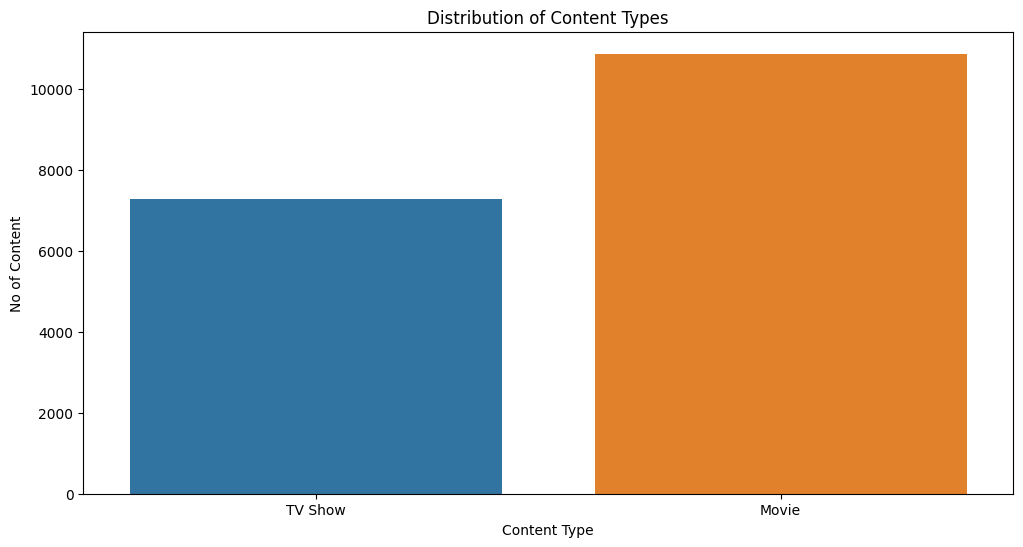

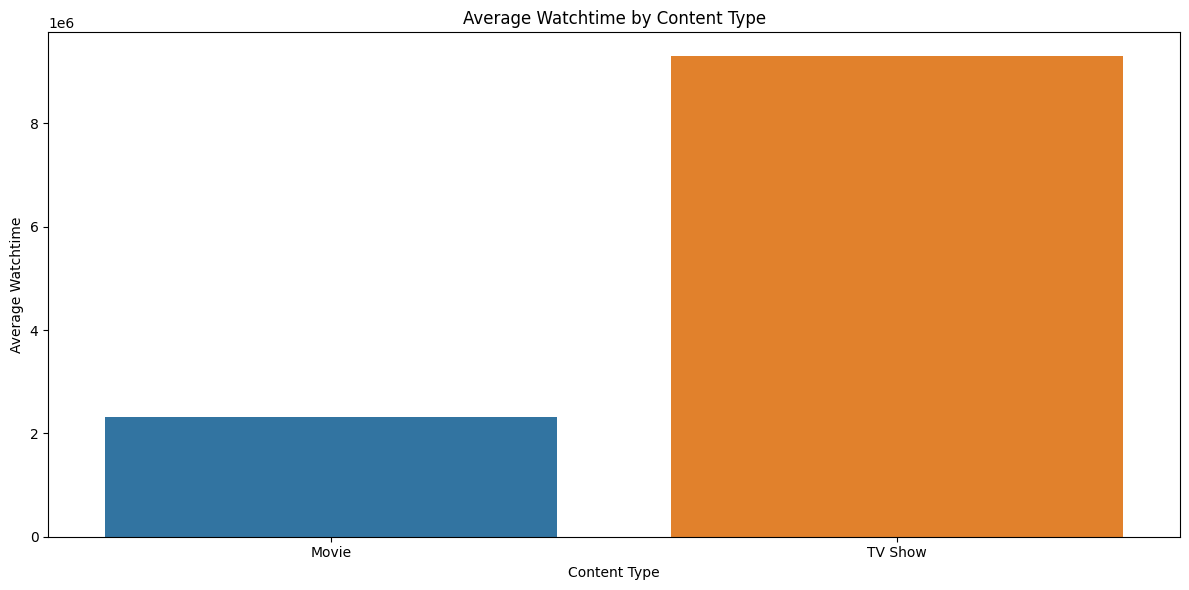

In [ ]:
# Distribution of content types
DataContent = data['Type'].value_counts()

# Average watchtime by content type
avgWatchtimeByType = data.groupby('Type')['Watchtime'].mean().reset_index()

plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(x='Type', data=data)
plt.title('Distribution of Content Types')
plt.xlabel('Content Type')
plt.ylabel('No of Content')
plt.xticks(rotation=360)

# Plotting average watchtime by content type
plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(x='Type', y='Watchtime', data=avgWatchtimeByType)
plt.title('Average Watchtime by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Watchtime')
plt.xticks(rotation=360)

# Displaying the corrected content type distribution plot
plt.tight_layout()
plt.show()

First chart shows the number of content items by type. The x-axis represents the "Content Type" (TV Show or Movie), and the y-axis represents the count of items. Movies have a higher count than TV Shows, indicating that there are more movies in the dataset compared to TV shows.
Second chart shows the average watchtime for each content type. The x-axis again represents "Content Type," while the y-axis represents the average watchtime. TV Shows have a higher average watchtime than Movies, which might be because TV shows usually have multiple episodes, leading to a longer overall viewing duration compared to movies.
while movies are more numerous, TV shows tend to have higher average watchtime, likely due to their episodic nature.

In [ ]:
watchtime_by_year = data.groupby("Premiere")["Watchtime"].agg(["mean"])
watchtime_by_year

,mean
Premiere,
1940,2.900000e+06
1951,2.000000e+05
1952,1.000000e+05
1953,2.000000e+05
1954,3.000000e+05
...,...
2019,3.317757e+06
2020,5.312870e+06
2021,5.507292e+06


In [ ]:
# cleaned_data.shape

In [ ]:
# cleaned_data = watchtime_by_year.drop(labels='Unknown', axis=0)

In [ ]:
# cleaned_data

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Average Watchtime for Years'}, xlabel='Premiere Year', ylabel='Average Watching Time in Million'>

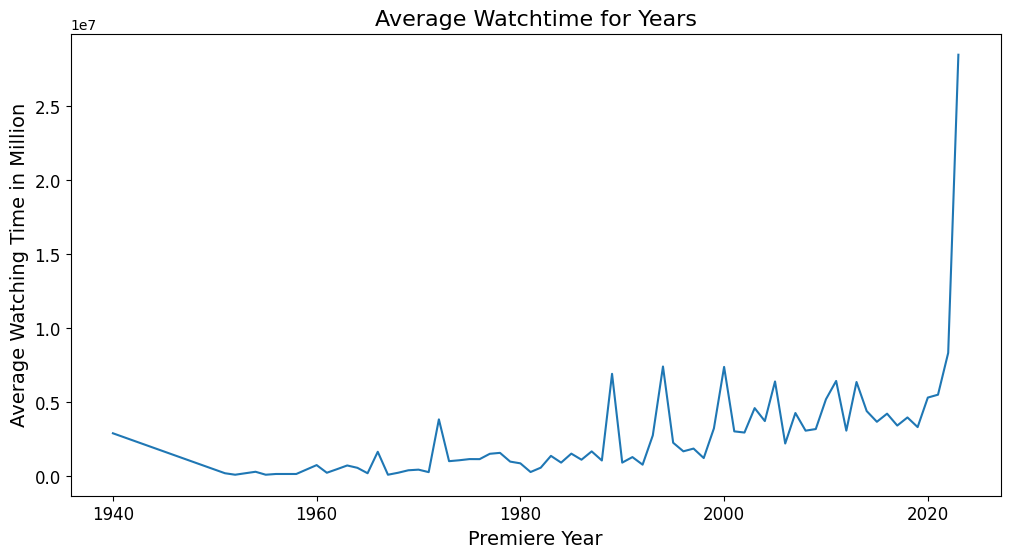

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Average Watchtime for Years", fontsize=16)
plt.xlabel("Premiere Year", fontsize=14)
plt.ylabel("Average Watching Time in Million", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.lineplot(x=watchtime_by_year.index, y=watchtime_by_year["mean"])



The average watch time for the movie gradually increased over the years, peaking in 2020. This surge may be attributed to the pandemic, during which people had more free time, leading to a significant rise in watch time.

In [ ]:
# Creating two datasets according to the Tv and movies 
movie = data[data['Type']=='Movie']
tv = data[data['Type']=='TV Show']

In [ ]:
movie.head()

,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
Rank,,,,,,
14.0,The Mother,Movie,2023,Thriller,249900000,249.9
20.0,Luther: The Fallen Sun,Movie,2023,Crime,209700000,209.7
23.0,Extraction 2,Movie,2023,Action,201800000,201.8
29.0,You People,Movie,2023,Comedy,181800000,181.8
33.0,Murder Mystery 2,Movie,2023,Comedy,173600000,173.6


In [ ]:
MoviewatchtimeBymovie = movie.groupby("Premiere")["Watchtime"].agg(["mean"])
MoviewatchtimeByTv = tv.groupby("Premiere")["Watchtime"].agg(["mean"])

In [ ]:
MoviewatchtimeByTv.shape

(54, 1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

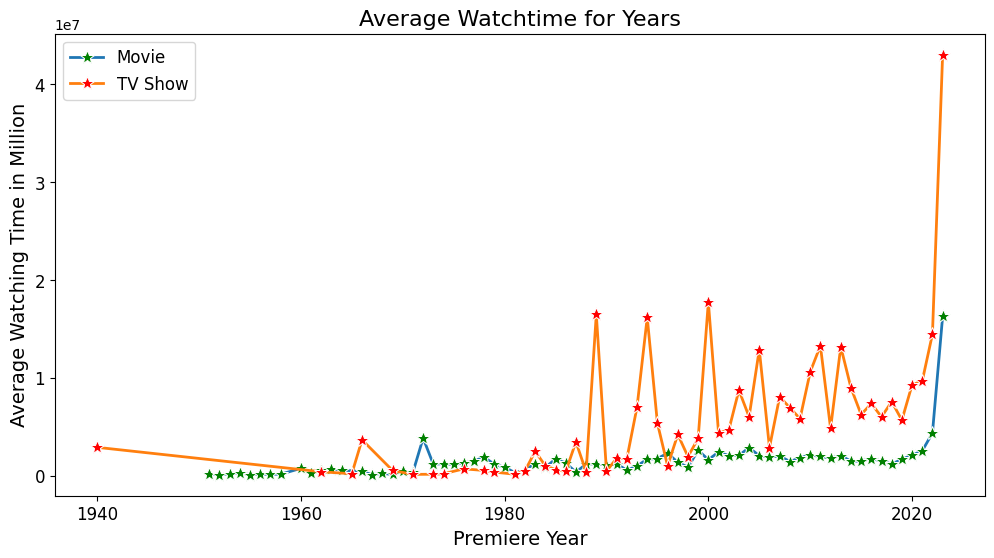

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Average Watchtime for Years", fontsize=16)
plt.xlabel("Premiere Year", fontsize=14)
plt.ylabel("Average Watching Time in Million", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.lineplot(x=MoviewatchtimeBymovie.index, y=MoviewatchtimeBymovie["mean"], data = MoviewatchtimeBymovie, marker='*',label = "Movie", markerfacecolor= 'green', markersize=10, linewidth=2)
sns.lineplot(x=MoviewatchtimeByTv.index, y=MoviewatchtimeByTv["mean"], data = MoviewatchtimeByTv, marker='*', label = "TV Show", markerfacecolor= 'red', markersize=10, linewidth=2)
plt.legend(fontsize = 12);
plt.show()


The graph displays the average watch time in millions for movies and TV shows. The average watch time for movies remained relatively stable until 2020, when it experienced a sharp increase. In contrast, TV shows saw fluctuations in watch time between 1995 and 2018, followed by a significant peak in 2020. Overall, the watch time for TV shows is notably higher than for movies, indicating that people tend to watch TV shows more frequently than movies.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

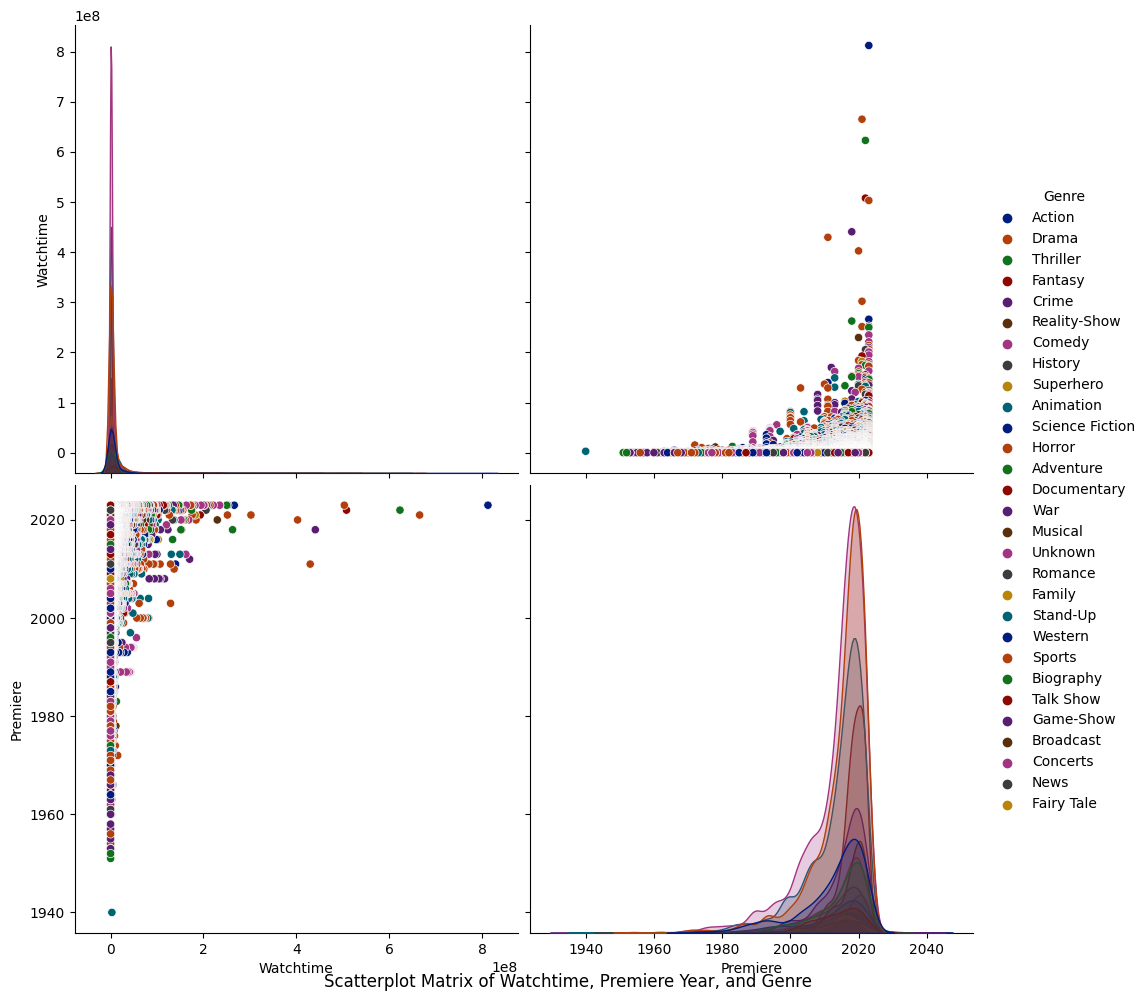

In [ ]:
#plt.figure(figsize=(12, 6))
sns.pairplot(data[['Watchtime', 'Premiere', 'Genre']], hue='Genre', palette='dark', height=5)
plt.suptitle('Scatterplot Matrix of Watchtime, Premiere Year, and Genre', y=0.02)
plt.show()

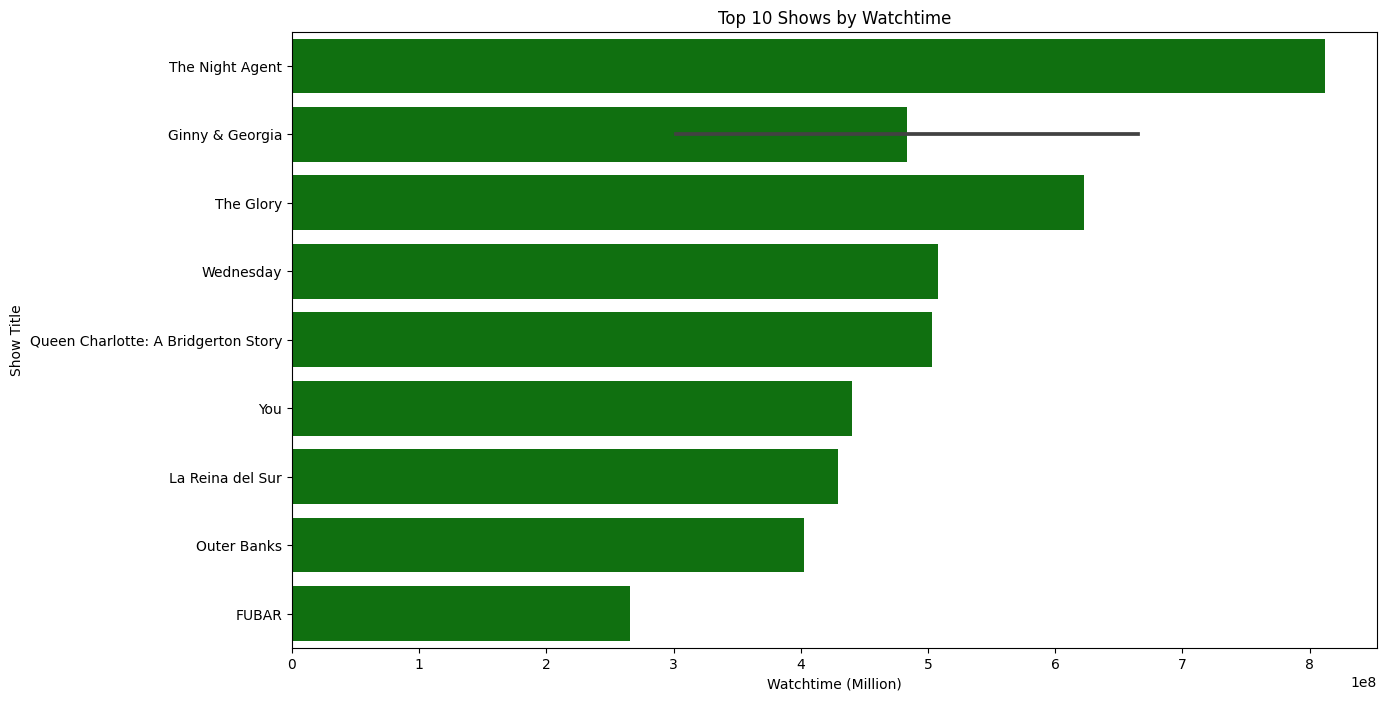

In [ ]:
top_10_shows = data.sort_values(by='Watchtime', ascending=False).head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x='Watchtime', y='Title', data=top_10_shows, color='Green')
plt.title('Top 10 Shows by Watchtime')
plt.xlabel('Watchtime (Million)')
plt.ylabel('Show Title')
plt.show()

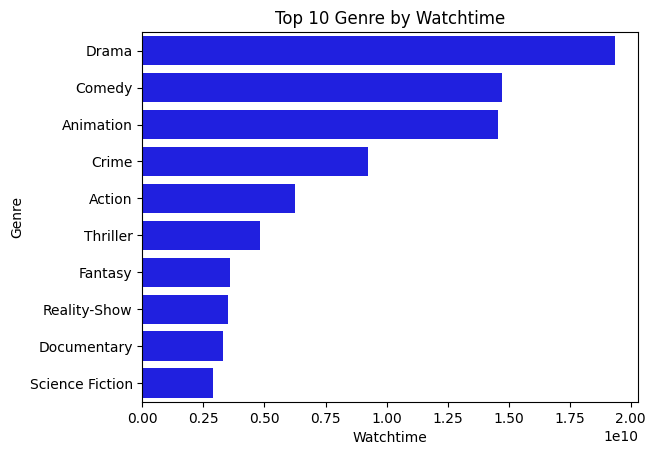

In [ ]:
top_ten_genre = data.groupby("Genre")["Watchtime"].sum().sort_values(ascending=False).to_frame().head(10)
sns.barplot(x=top_ten_genre.Watchtime, y=top_ten_genre.index, color='blue')
plt.title('Top 10 Genre by Watchtime')
plt.show()

The first graph highlights the top 10 most popular shows ranked by watch time. *The Night Agent* stands out with the highest watch time, making it the most popular show, while *The Glory* follows as the second most-watched. Each show in this ranking demonstrates varying levels of viewer engagement, with a noticeable gap between the top-ranking shows and those lower on the list.

The second graph categorizes viewer preferences by genre, showing drama as the most popular genre, accumulating the highest watch time. Comedy and animation follow, indicating strong viewer interest in these genres as well. At the opposite end, science fiction and documentry have the lowest watch time, suggesting it attracts a smaller audience. Together, these graphs reveal viewing trends, indicating that audiences show a particular preference for drama over other genres.